In [1]:
import numpy as np
from scipy.io import loadmat  
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def load_cols():
    mat = loadmat('WS_P1_S1.mat')
    eegnames = mat['ws']['names'][0][0][0][0][0][0]
    emgnames = mat['ws']['names'][0][0][0][0][2][0]
    eegcolumns = []
    emgcolumns = []

    for name in eegnames:
        eegcolumns.append(name[0])
    for name in emgnames:
        emgcolumns.append(name[0])
    return eegcolumns, emgcolumns

In [3]:
def load_all_trials_from_file(participant,session,eegcolumns,emgcolumns):
    mat = loadmat('WS_P' + str(participant) + '_S' + str(session) + '.mat')
    
    trials = {}
    for i, trial in enumerate(mat['ws']['win'][0][0][0]):
        trialdict = {}
        trialdict['eeg'] = pd.DataFrame(trial[0],columns=eegcolumns)
        trialdict['emg'] = pd.DataFrame(trial[2],columns=emgcolumns)
        trialdict['eegt'] = trial[3][0]
        trialdict['emgt'] = trial[4][0]
        trialdict['start_time'] = trial[5][0][0]
        trialdict['LEDon'] = trial[7][0][0]
        trialdict['LEDoff'] = trial[8][0][0]
        trialdict['weight_in_grams'] = float(trial[10][0].strip('g'))
        trialdict['texture'] = trial[12][0]

        trials['trial ' + str(i+1)] = trialdict
    
    return trials



In [4]:
def load_participants_ws(firstp,lastp,firsts,lasts):
    eegcols, emgcols = load_cols()
    data = {}
    for participant in range(firstp, lastp + 1):
        participantdict = {}
        for session in range(firsts, lasts + 1):
            participantdict['session ' + str(session)] = load_all_trials_from_file(participant,session,eegcols,emgcols)
        data['participant ' + str(participant)] = participantdict
    return data


In [5]:
data = load_participants_ws(1,2,1,3)

In [6]:
data['participant 2']['session 2']['trial 10']['eeg']

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,401.0,497.0,335.0,643.0,-37.0,468.0,72.0,542.0,-58.0,132.0,...,265.0,100.0,269.0,196.0,331.0,-101.0,192.0,271.0,219.0,230.0
1,464.0,583.0,394.0,709.0,-39.0,526.0,169.0,588.0,0.0,187.0,...,332.0,142.0,310.0,227.0,389.0,-41.0,218.0,270.0,238.0,260.0
2,491.0,589.0,429.0,770.0,-25.0,600.0,215.0,639.0,48.0,233.0,...,384.0,215.0,340.0,278.0,453.0,58.0,278.0,368.0,323.0,338.0
3,540.0,591.0,488.0,801.0,-43.0,635.0,235.0,713.0,77.0,260.0,...,390.0,240.0,371.0,304.0,514.0,82.0,299.0,420.0,390.0,435.0
4,534.0,634.0,525.0,804.0,-44.0,623.0,259.0,712.0,79.0,288.0,...,382.0,211.0,367.0,320.0,526.0,41.0,302.0,409.0,369.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5786,312.0,108.0,785.0,573.0,-58.0,691.0,-10.0,705.0,85.0,317.0,...,414.0,154.0,340.0,268.0,416.0,201.0,464.0,184.0,221.0,46.0
5787,260.0,106.0,741.0,524.0,-50.0,651.0,-37.0,663.0,58.0,293.0,...,363.0,109.0,323.0,210.0,358.0,112.0,420.0,133.0,180.0,-9.0
5788,171.0,90.0,607.0,446.0,-28.0,571.0,-156.0,563.0,-18.0,215.0,...,285.0,19.0,252.0,157.0,278.0,-33.0,341.0,91.0,193.0,26.0
5789,98.0,22.0,487.0,335.0,-30.0,493.0,-264.0,458.0,-105.0,162.0,...,160.0,-86.0,175.0,92.0,191.0,-124.0,216.0,-47.0,78.0,-54.0


In [7]:
def load_to_df(filename):
    mat = loadmat(filename)
    mdata = mat['hs']  
    mdtype = mdata.dtype  
    ndata = {n: mdata[n][0, 0] for n in mdtype.names}

    emg = ndata['emg']
    eeg = ndata['eeg']
    emgsamplingrate = 4000
    eegsamplingrate = 500

    eegdata = eeg[0][0][1]
    eegcolumnnames = eeg[0][0][0][0]
    emgcolumnnames = emg[0][0][1][0]
    emgdata = emg[0][0][0]

    eegcolumns = []
    for element in eegcolumnnames:
        eegcolumns.append(element[0])

    emgcolumns = []
    for element in emgcolumnnames:
        emgcolumns.append(element[0])

    eegdf = pd.DataFrame(eegdata,columns=eegcolumns)
    emgdf = pd.DataFrame(emgdata,columns=emgcolumns)
    eegt = np.arange(0,eegdf.shape[0]/eegsamplingrate,1/eegsamplingrate)
    emgt = np.arange(0,emgdf.shape[0]/emgsamplingrate,1/emgsamplingrate)

    return eegdf, emgdf, eegt, emgt


In [8]:
def load_dfs_to_dict(participant, session):
    filename = 'HS_P' + str(participant) + '_S' + str(session) +'.mat'
    eegdf, emgdf, eegt, emgt = load_to_df(filename)
    list = [eegdf, emgdf, eegt, emgt]
    dictionary = {}
    attribute_list = ['eegdf','emgdf','eegt','emgt']
    for i, att in enumerate(attribute_list):
        dictionary[att] = list[i]

    return dictionary







In [9]:

def load_participants_hs(firstp, lastp, firsts, lasts):
    data = {}
    for participant in range(firstp, lastp + 1):
        participantdict = {}
        for session in range(firsts, lasts + 1):
            participantdict['session ' + str(session)] = load_dfs_to_dict(participant,session)
        data['participant ' + str(participant)] = participantdict
    return data

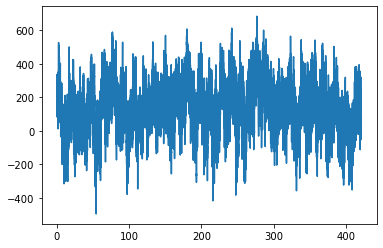

In [10]:
data = load_participants_hs(1,2,5,7)
eegdf = data['participant 1']['session 5']['eegdf']
time = data['participant 1']['session 5']['eegt']
plt.plot(time,eegdf['Pz'])